In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('dark_background')

# Задание #2 Pandas

## Инструменты и ресурсы для выполнения задания

### Библиотеки Python

  * [Pandas](http://pandas.pydata.org/)
    - [Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
    - [Easier data analysis in Python with pandas](http://www.dataschool.io/easier-data-analysis-with-pandas/)

### Ресурсы по Titanic dataset
  * [Сам конкурс](https://www.kaggle.com/c/titanic)
  * [Пример решения конкурса](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Еще пример](https://habrahabr.ru/company/mlclass/blog/270973/)
  
## Разминка
**Как и в предыдущем задании здесь запрещено использовать циклы, если это специально не оговорено.**
1. Скачайте Titanic dataset и загрузите его в pandas.DataFrame; выведите первые 5 записей в ноутбук. Как можно интерпретировать данную таблицу?

In [ ]:
%%bash
kaggle competitions download -c titanic
unzip -q './titanic.zip' -d './data'

In [ ]:
df = pd.read_csv('data/train.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S


2. Получите имена столбцов.

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Oops! That's a for loop

In [ ]:
for i in df.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


3. Перемешайте строки в случайном порядке.

In [ ]:
df_shuffle = df.sample(frac=1).reset_index(drop=True)

4. Получите случайную подвыборку данных с возвращением и без.

In [ ]:
df_random_with_seed = df.sample(frac=0.6, random_state=66)
df_random_without_seed = df.sample(frac=0.6)

5. Разбейте данные случайным образом на две непересекающиеся подвыборки.

In [ ]:
random_number = int(666*np.random.rand(1))
first_part, second_part = df_shuffle.iloc[:random_number,:], df_shuffle.iloc[random_number,:]

6. Проверьте, является ли признак **Name** уникальным для каждого пассажира, если да, то сделайте его новым индексом данных.

In [ ]:
print(df.Name.nunique() == len(df.Name))
df.Name.is_unique

True


True

In [ ]:
df = df.set_index('Name')

7. Проверьте, содержат ли данные пропуски, если да, то заполните их.

In [ ]:
def display_null(df):
  df_null_series = df.isnull().sum()
  df_null = pd.DataFrame(data=df_null_series, columns=['Num of nan'])
  df_null['% of nan'] = round((df.isnull().sum() / df.shape[0]) * 100)
  display(df_null)

display_null(df)

,Num of nan,% of nan
PassengerId,0,0
Survived,0,0
Pclass,0,0
Sex,0,0
Age,177,20
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,0
Cabin,687,77


![](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)

In [ ]:
df['Cabin_new'] = df.Cabin.apply(lambda x: x[0] if pd.notnull(x) else 'M')
df['Cabin_new'] = df['Cabin_new'].replace(['A', 'B', 'C', 'T'], 'ABCT')
df['Cabin_new'] = df['Cabin_new'].replace(['D', 'E'], 'DE')
df['Cabin_new'] = df['Cabin_new'].replace(['F', 'G'], 'FG')
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. 

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_new
Name,,,,,,,,,,,,
"Icard, Miss. Amelie",62,1,1,female,38,0,0,113572,80,B28,NaN,ABCT
"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,1,female,62,0,0,113572,80,B28,NaN,ABCT


When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')
df.drop(['Cabin'], axis=1, inplace=True)
display_null(df)

,Num of nan,% of nan
PassengerId,0,0
Survived,0,0
Pclass,0,0
Sex,0,0
Age,0,0
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,0
Embarked,0,0


8. Определите, как много пассажиров ехало первым классом.

In [ ]:
first_class = df.Pclass.value_counts()
print(f'The total number of first class passengers on a sinking ship: {first_class[1]}')

The total number of first class passengers on a sinking ship: 216


9. Постройте гистограмму возрастов пассажиров.

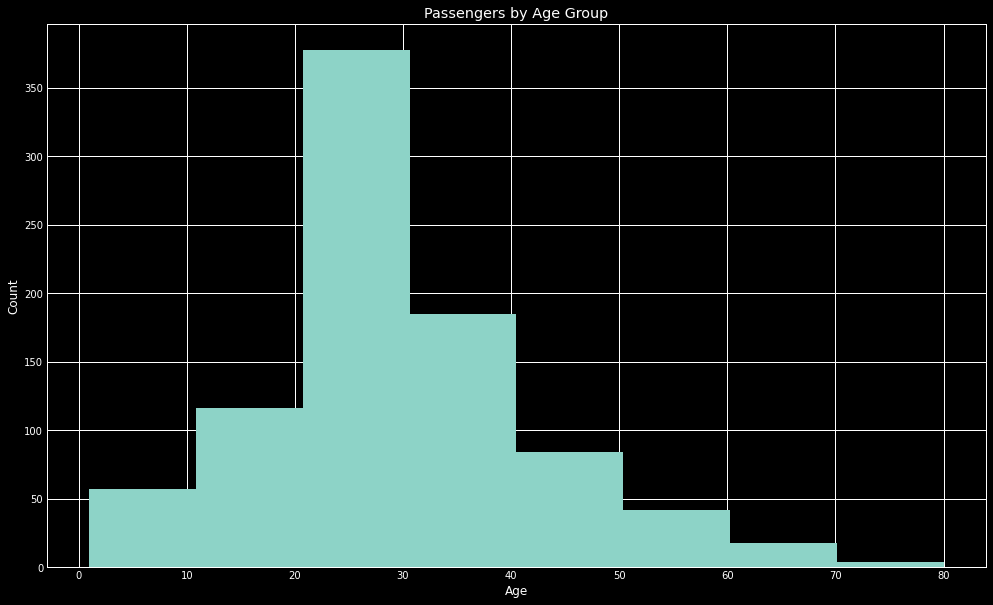

In [ ]:
plt.rc('figure', figsize=(15, 10))
df_age = df['Age']
plt.title('Passengers by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
max_age = max(df['Age'])
plt.hist([df_age],
         bins=8,
         range=(1, max_age),
         stacked=True)
plt.show()

10. Определите средний возраст пассажиров, медианный возраст, дисперсию.

In [ ]:
print(f'Mean age: {int(df.Age.mean())}')
print(f'Median age: {int(df.Age.median())}')
print(f'Standard deviation: {int(df.Age.std())}\n')
df['Age'].describe()

Mean age: 29
Median age: 26
Standard deviation: 13



count    891
mean      29
std       13
min        0
25%       21
50%       26
75%       36
max       80
Name: Age, dtype: float64

11. Добавьте признак, который показывает, какой процент пассажиров имели возраст строго меньше, чем данный пассажир.

In [ ]:
df['PerYounger'] = df['Age'].apply(lambda x: (df.Age[df.Age < x].count() / df.shape[0] * 100))
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_new,PerYounger
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22,1,0,A/5 21171,7,S,M,28
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38,1,0,PC 17599,71,C,ABCT,77
"Heikkinen, Miss. Laina",3,1,3,female,26,0,0,STON/O2. 3101282,8,S,M,49
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35,1,0,113803,53,S,ABCT,70
"Allen, Mr. William Henry",5,0,3,male,35,0,0,373450,8,S,M,70


12. Коррелируют ли число братьев/сестер с числом родителей/детей?

In [ ]:
df['SibSp'].corr(df['Parch'])

0.41483769862015557

SibSp and Parch features are positively correlated(moderate correlation) which are both indicative of the number of family members accompanying passenger

14. Есть ли зависимость между классом и номером билета?

In [ ]:
df['Ticket_freq'] = df.groupby('Ticket')['Ticket'].transform('count')
df['Pclass'].corr(df['Ticket_freq'])

-0.002632886197776046

Well that wasn't smart. I guess not.

15. Какой части пассажиров удалось выжить?

In [ ]:
df_per = df[df['Survived'] == 1].count().values[1] / df.shape[0] * 100
print(f'The percentage of survived people: {int(df_per)}%.')

The percentage of survived people: 38%.


16. Сделайте визуализацию, позволяющую ответить на вопросы:
  * Верно ли, что женщины выживали чаще мужчин?


Yes, that's true.

In [ ]:
survival_rate = df.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.74
male,0.19


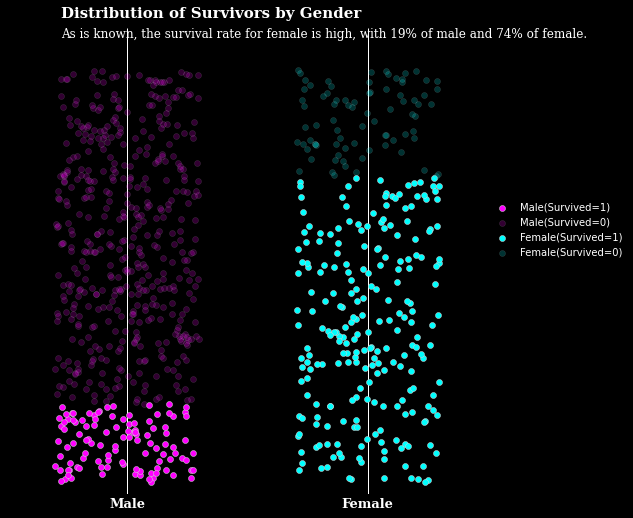

In [ ]:
male_pos = np.random.uniform(0, male_rate, len(df[(df['Sex']=='male') & (df['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(df[(df['Sex']=='male') & (df['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(df[(df['Sex']=='female') & (df['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(df[(df['Sex']=='female') & (df['Survived']==0)]))

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
np.random.seed(66)
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#FF00FF', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#FF00FF', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#00FFFF', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#00FFFF', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
for s in ["top","right","left", 'bottom']: #I'm trully sorry
    ax.spines[s].set_visible(False)

fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

  * Верно ли, что чаще выживали пассажиры с более дорогими билетами?

In [ ]:
survivor_count = df['Survived'].sum()
def get_survival_rate(df, col):
    by_col = df.groupby(col)
    count_by_col = by_col['Survived'].sum()
    survival_rate = count_by_col / survivor_count * 100
    print('Survival rates:', survival_rate, '\n \n', 'Counts: ', count_by_col)
    return survival_rate, count_by_col
def class_count(df, num):
  num_class_count = (df['Pclass'] == num).sum()
  num_class = num_class_count / df.shape[0] * 100
  return round(num_class, 2), num_class_count

first_class, second_class, third_class = class_count(df, 1), class_count(df, 2), class_count(df, 3)

print('First class percentage = ', first_class[0], ' | Count: ', first_class[1])
print('Second class percentage = ', second_class[0], ' | Count: ', second_class[1])
print('Third class percentage = ', third_class[0], ' | Count: ', third_class[1])

First class percentage =  24.24  | Count:  216
Second class percentage =  20.65  | Count:  184
Third class percentage =  55.11  | Count:  491


We see that:



*   the first class represents about a quarter of the passengers on board (≈ 24%)
*   the second class represents a little less than a quarter of the passengers on board (≈ 20%)
*   the third class represents more than half of the passengers onboard (≈ 55%)

Let's now compare these percentages with the survival ones.

In [ ]:
get_survival_rate(df, 'Pclass')

Survival rates: Pclass
1   39.77
2   25.44
3   34.80
Name: Survived, dtype: float64 
 
 Counts:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


(Pclass
 1   39.77
 2   25.44
 3   34.80
 Name: Survived, dtype: float64, Pclass
 1    136
 2     87
 3    119
 Name: Survived, dtype: int64)

With these survival rates, we can see that:

*   The first class represents ≈ 24% of the passengers, but ≈ 40% of the survivors
*   The second class represents ≈ 20% of the passengers, but ≈ 25% of the survivors
*   The third class representes ≈ 55% of the passengers, but ≈ 34% of the survivors

Let's visualize these results to get a better understanding.

In [ ]:
def get_counts(df, col, num, status):
    target = df[col].where(df[col] == num)
    class_count = target.where(df['Survived'] == status).count()
    return class_count
def gen_plot(survival_array, death_array, by_factor, x_ticks):
    abs_survival_list = np.array(survival_array)
    abs_death_list = np.array(death_array)
    N = len(abs_survival_list)
    ind = np.arange(N)
    width = 1 / N

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    ax1.bar(ind, abs_survival_list, width, color='#00FFFF', label='Survival', alpha=0.8)
    ax1.bar(ind, abs_death_list, width, color='#FF00FF', label='Death', alpha=0.8, bottom=abs_survival_list)
    plt.sca(ax1)
    plt.xticks(ind, x_ticks)
    ax1.set_title('Absolute count ' + by_factor)
    ax1.set_ylabel('Count')
    ax1.legend(loc='upper left')
    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    per_survival_list = (abs_survival_list / (abs_survival_list + abs_death_list)) * 100
    per_death_list = (abs_death_list / (abs_survival_list + abs_death_list)) * 100

    ax2.bar(ind, per_survival_list, width, color='#00FFFF', label='Survival percentage', alpha=0.8)
    ax2.bar(ind, per_death_list, width, color='#FF00FF', label='Death percentage', alpha=0.8, bottom=per_survival_list)
    plt.sca(ax2)
    plt.xticks(ind, x_ticks)
    ax2.set_title('Percentage ' + by_factor)
    ax2.set_ylabel('Percentage')
    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    return plt.show()
    
class1_survival_count = get_counts(df, 'Pclass', 1, 1)
class2_survival_count = get_counts(df, 'Pclass', 2, 1)
class3_survival_count = get_counts(df, 'Pclass', 3, 1)
class1_death_count = get_counts(df, 'Pclass', 1, 0)
class2_death_count = get_counts(df, 'Pclass', 2, 0)
class3_death_count = get_counts(df, 'Pclass', 3, 0)

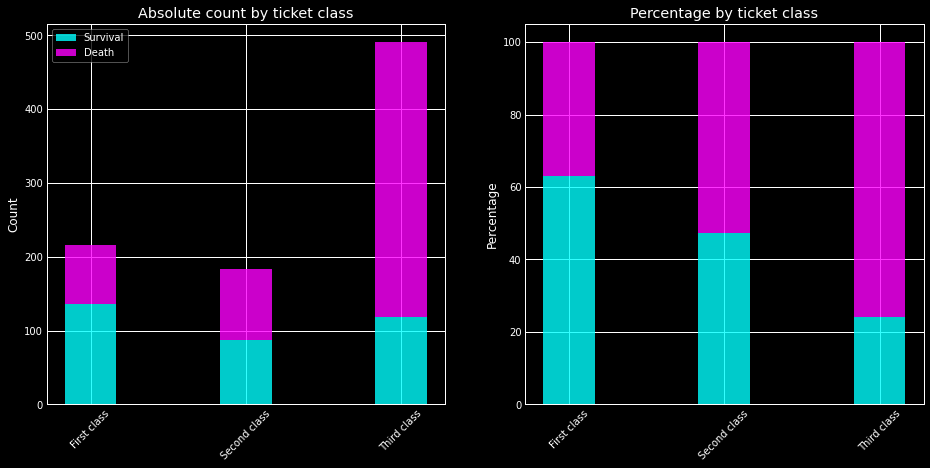

In [ ]:
gen_plot([class1_survival_count, class2_survival_count, class3_survival_count],
         [class1_death_count, class2_death_count, class3_death_count],
         'by ticket class',
         ['First class', 'Second class', 'Third class'])

We can see that there is a clear correlation between death and ticket class: the higher your ticket class, the higher your chances of survival.